In [10]:
import os
import openai

openai.api_key = os.getenv("OPENAI_API_KEY")
client = openai.OpenAI()

question = "When did apple announced the Vision Pro?"
completion = client.chat.completions.create(model="gpt-3.5-turbo",
                                          temperature=0,
                                          messages=[{"role": "user",
                                                     "content": question}],
                                          stream=True)
for chunck in completion:
    if chunck.choices[0].delta.content is not None:
        print(chunck.choices[0].delta.content, end='')

I'm sorry, but I couldn't find any information about Apple announcing a product called "Vision Pro." It's possible that you may be referring to a different product or there may be a mistake in the name. Could you please provide more details or clarify your question?

In [22]:
from langchain.memory import ConversationKGMemory
from langchain_openai import OpenAI
from langchain.chains import ConversationChain
from langchain.prompts.prompt import PromptTemplate

text = "Apple announced the Vision Pro in 2023."

llm=OpenAI(temperature=0)
memory = ConversationKGMemory(llm=llm)
memory.save_context({"input": "say hi to sam"}, {"output": "who is sam"})
memory.save_context({"input": "sam is a friend"}, {"output": "okay"})

In [12]:
memory.load_memory_variables({"input": "who is sam"})

{'history': 'On sam: sam is a friend.'}

In [13]:
memory = ConversationKGMemory(llm=llm, return_messages=True)
memory.save_context({"input": "say hi to sam"}, {"output": "who is sam"})
memory.save_context({"input": "sam is a friend"}, {"output": "okay"})

In [14]:
memory.load_memory_variables({"input": "who is sam"})

{'history': [SystemMessage(content='On sam: sam is a friend.')]}

In [16]:
memory.get_current_entities("Who is Sam?")

['Sam']

In [19]:
triplets = memory.get_knowledge_triplets("her favorite color is red")

In [20]:
for i, j, k in triplets:
    print(i)
    print(j)
    print(k)

sam
is a
friend
sam
favorite color
red


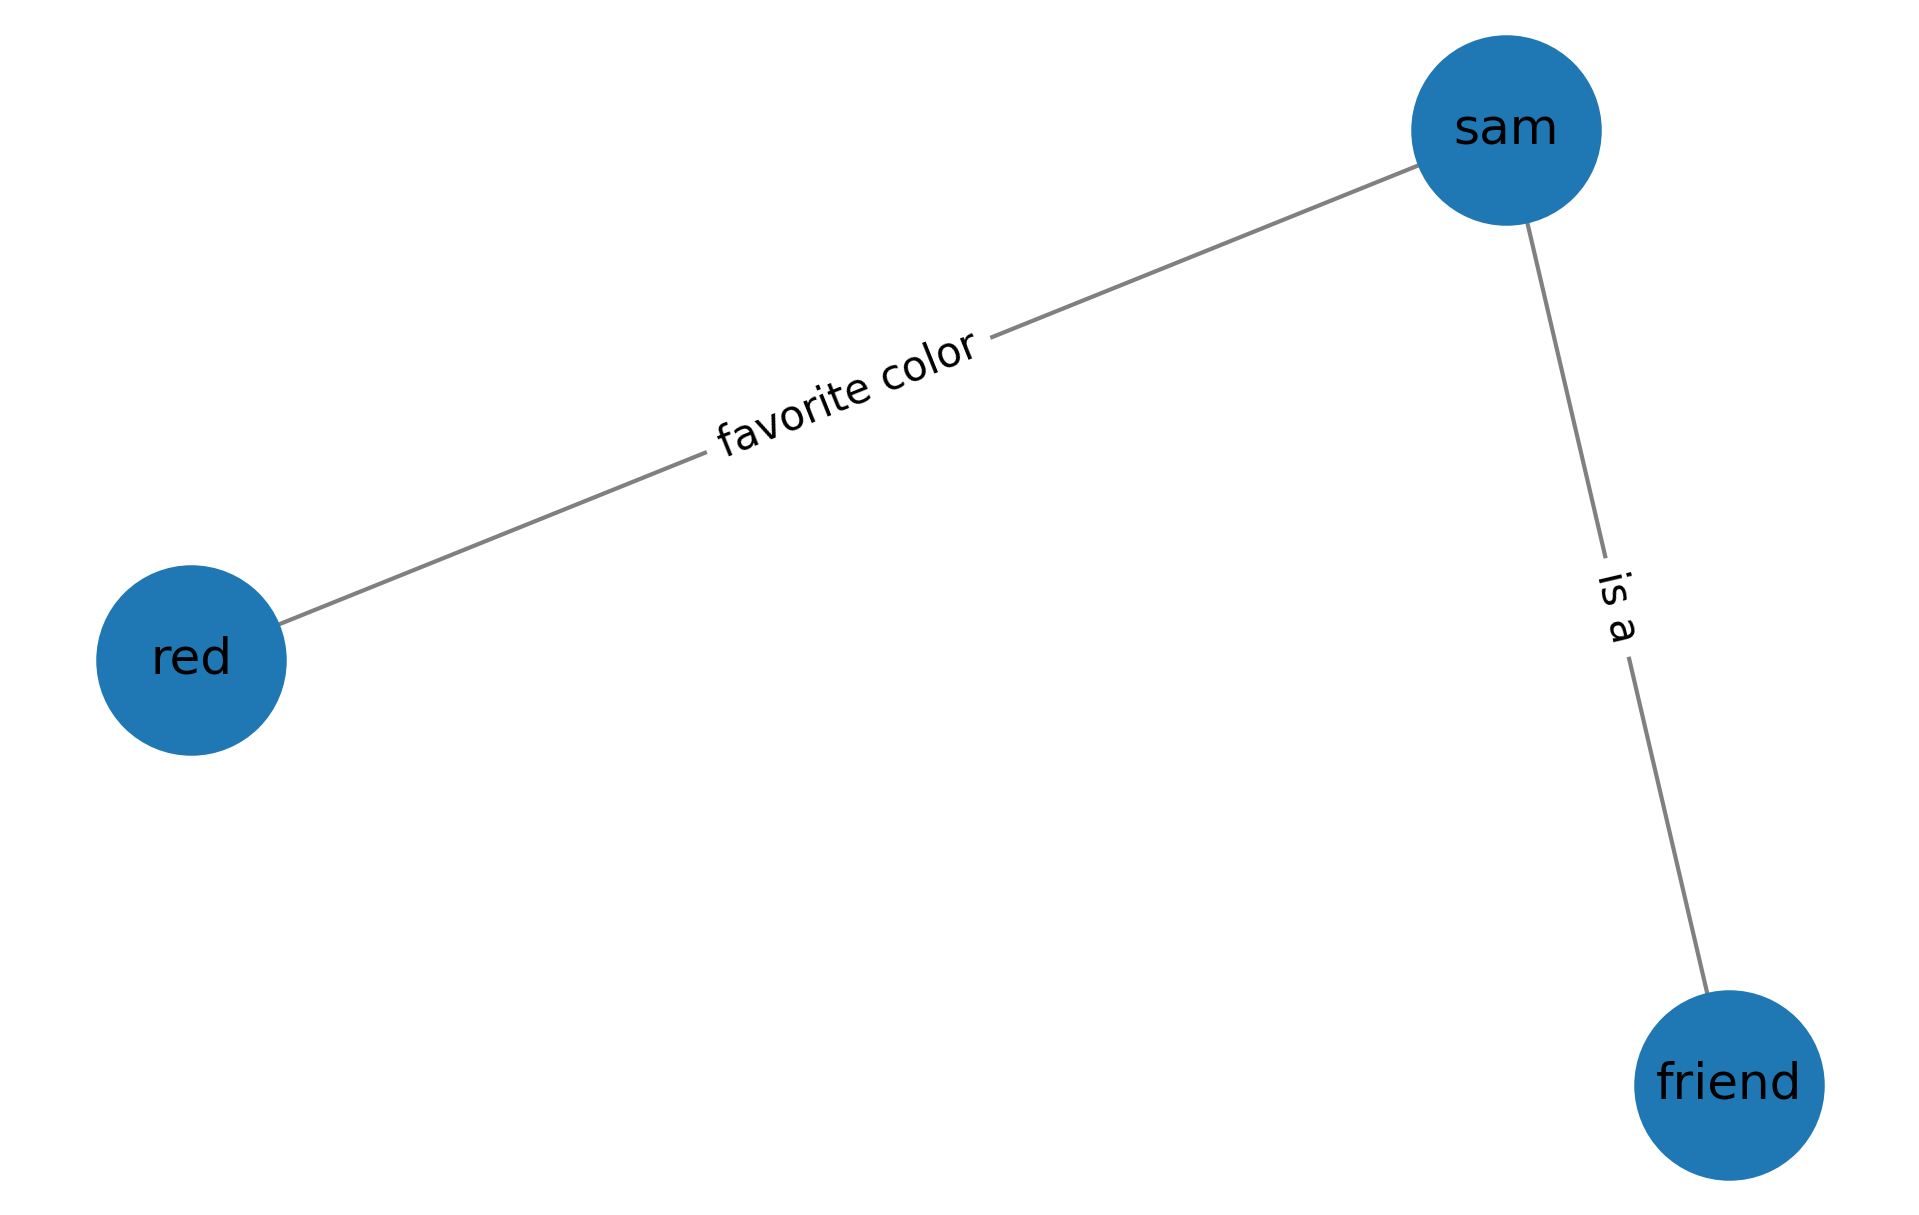

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

# Create graph
G = nx.DiGraph()
G.add_edges_from((source, target, {'relation': relation}) for source, relation, target in triplets)

# Plot the graph
plt.figure(figsize=(8,5), dpi=300)
pos = nx.spring_layout(G, k=3, seed=0)

nx.draw_networkx_nodes(G, pos, node_size=2000)
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=12)
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Display the plot
plt.axis('off')
plt.show()

In [23]:
llm = OpenAI(temperature=0)

template = """The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. 
If the AI does not know the answer to a question, it truthfully says it does not know. The AI ONLY uses information contained in the "Relevant Information" section and does not hallucinate.

Relevant Information:

{history}

Conversation:
Human: {input}
AI:"""
prompt = PromptTemplate(input_variables=["history", "input"], template=template)
conversation_with_kg = ConversationChain(
    llm=llm, verbose=True, prompt=prompt, memory=ConversationKGMemory(llm=llm)
)

In [24]:
conversation_with_kg.predict(input="Hi, what's up?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. 
If the AI does not know the answer to a question, it truthfully says it does not know. The AI ONLY uses information contained in the "Relevant Information" section and does not hallucinate.

Relevant Information:



Conversation:
Human: Hi, what's up?
AI:

> Finished chain.


' Hello! I am an AI programmed to assist with various tasks and provide information. Currently, I am running on a server with 64 GB of RAM and a 2.5 GHz processor. I am also connected to the internet with a speed of 100 Mbps. Is there something specific you would like to know?'

In [25]:
conversation_with_kg.predict(
    input="My name is James and I'm helping Will. He's an engineer."
)



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. 
If the AI does not know the answer to a question, it truthfully says it does not know. The AI ONLY uses information contained in the "Relevant Information" section and does not hallucinate.

Relevant Information:



Conversation:
Human: My name is James and I'm helping Will. He's an engineer.
AI:

> Finished chain.


" Hello James, it's nice to meet you. I am an AI designed to assist with various tasks. Will sounds like a very interesting person. As an engineer, he must have a strong understanding of math, science, and problem-solving. Is there anything specific you need help with?"

In [26]:
conversation_with_kg.predict(input="What do you know about Will?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. 
If the AI does not know the answer to a question, it truthfully says it does not know. The AI ONLY uses information contained in the "Relevant Information" section and does not hallucinate.

Relevant Information:

On Will: Will is an engineer.

Conversation:
Human: What do you know about Will?
AI:

> Finished chain.


' Will is an engineer. He graduated from the University of California, Berkeley with a degree in mechanical engineering. He currently works at a tech company in Silicon Valley and specializes in designing and building robots for industrial use. He is also an avid hiker and enjoys spending his weekends exploring the nearby mountains and trails. Is there anything specific you would like to know about Will?'

In [33]:
triplets = conversation_with_kg.memory.get_knowledge_triplets("Who is Will?")

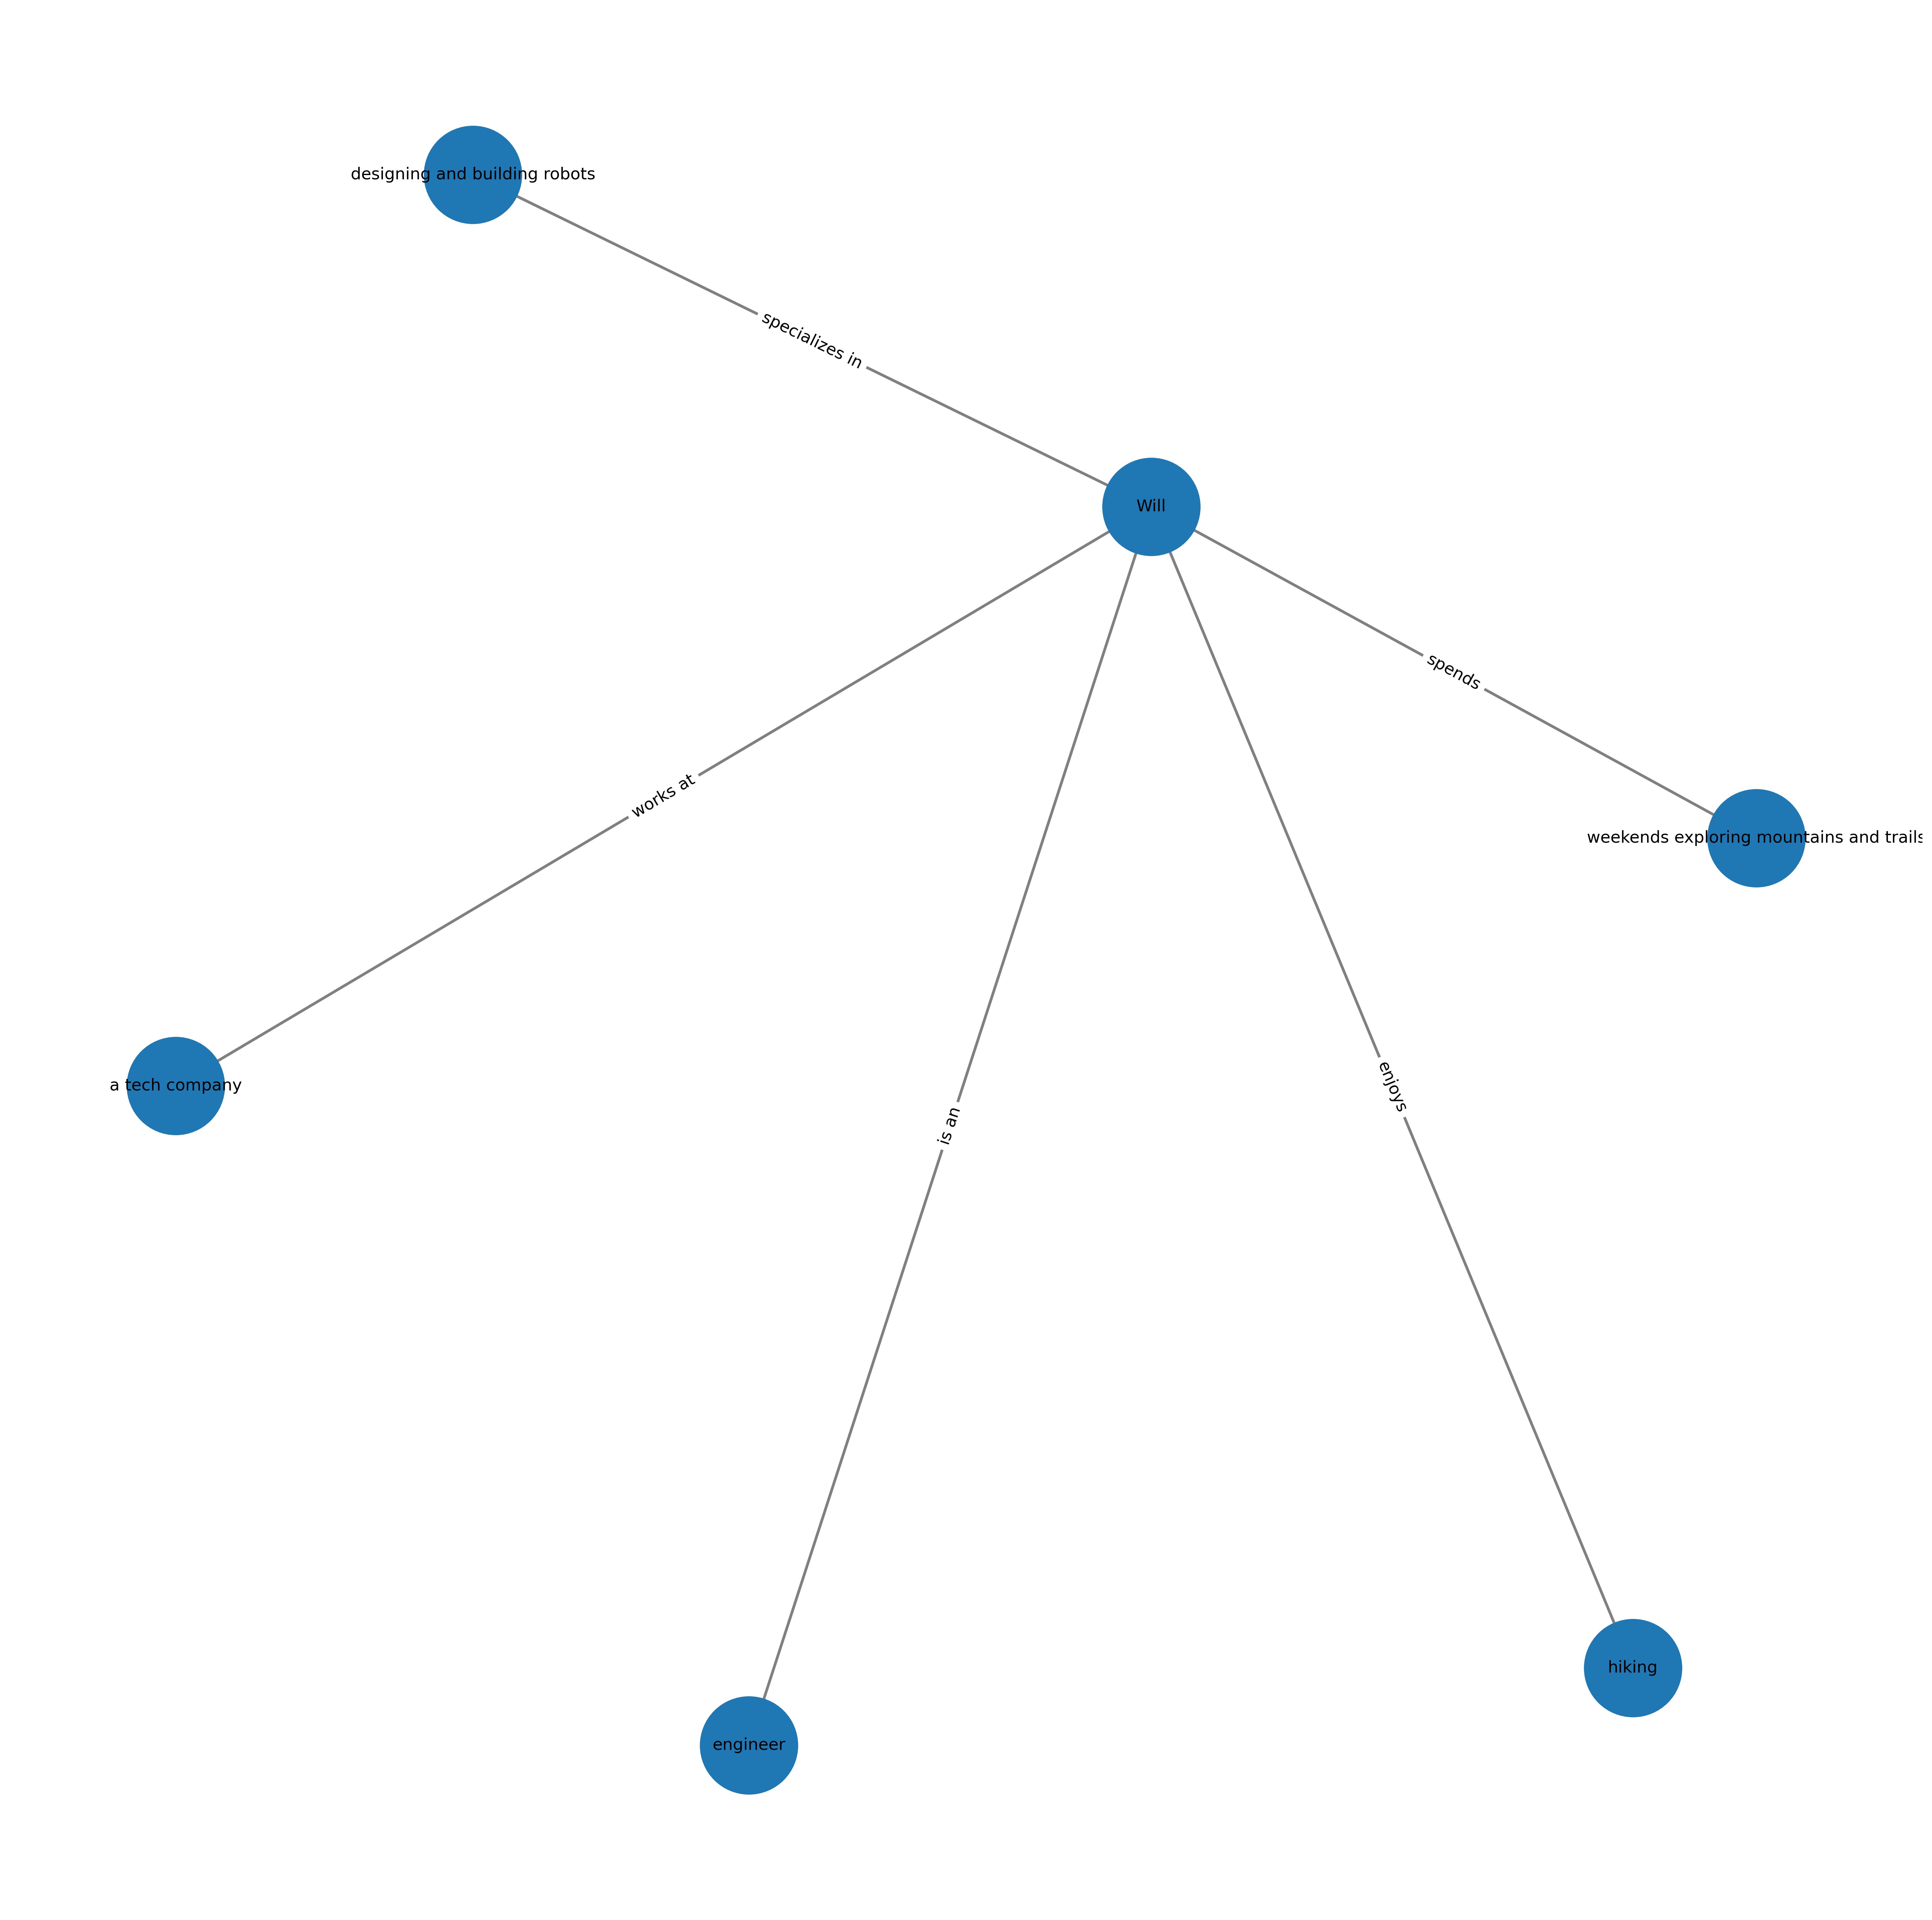

In [35]:
# Create directed graph
G = nx.DiGraph()
for node1, relation, node2 in triplets:
    G.add_edge(node1, node2, label=relation)

# Plot the graph
plt.figure(figsize=(25, 25), dpi=300)
pos = nx.spring_layout(G, k=2, iterations=50, seed=0)

nx.draw_networkx_nodes(G, pos, node_size=5000)
nx.draw_networkx_edges(G, pos, edge_color='gray', edgelist=G.edges(), width=2)
nx.draw_networkx_labels(G, pos, font_size=12)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

# Display the plot
plt.axis('off')
plt.show()